In [1]:
#importing main modules
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#loading the dataset
df = pd.read_csv("Crop_recommendation.csv")
print(df.head())

# #checking the shape of the dataset
# print(df.shape)


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [3]:
# #overview of dataset columns
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
# #num of values/observations for each class
df["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [6]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
# #checking for duplicate values
df.loc[df.duplicated()]

,N,P,K,temperature,humidity,ph,rainfall,label


In [8]:
# #checking for null values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
# #checking outliers
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df)
# plt.title('Box Plot of Features')
# plt.show()

In [10]:
# # checking distribution for each feature
# for column in df.columns:
#     plt.figure(figsize=(5, 3))
#     sns.histplot(df[column], bins=100)
#     plt.title(f'Distribution of {column}')
#     plt.show()

# Ideal transformations for features :
# N: Robust Scaler
# P' : Robust Scaler
# K: Robust Scaler
# Temp, ph: Standard Scaler
# Humidity, Rainfall: Log transformation

In [11]:
# for column in df.columns:
#     plt.figure(figsize=(5, 3))
#     sns.kdeplot(df[column])
#     plt.title(f'Distribution of {column}')
#     plt.show()

In [12]:
# for column in df.columns:
#     plt.figure(figsize=(10,6))
#     sns.scatterplot(data=df, x=column, y='label', hue='label')
#     plt.title(f'Distribution of {column}')
#     plt.show()

In [13]:
# #checking relations for features with each other
# plt.figure(figsize=(10, 6))
# sns.pairplot(df, hue='label')
# plt.show()


In [14]:
# #checking correlation
# df1= df.drop('label', axis=1)
# corr = df1.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

In [15]:
# df.columns.unique()

# le = LabelEncoder()
# df['label']= le.fit_transform(df['label']) 
# df['label'].unique()


In [16]:
# #checking correlation
# corr = df.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

In [17]:
# df['rain-ph'] = df['rainfall'] - df['ph']
# df.head()
# corr = df.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()



In [18]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\bhanu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
from sklearn.preprocessing import LabelEncoder


In [20]:

# le = LabelEncoder()
# df['label']= le.fit_transform(df['label']) 
# df['label'].unique()




In [21]:
# df['label'] = df['label'].map({
# 'rice' : 0,          
# 'maize' : 1,        
# 'jute' : 2,          
# 'cotton' : 3,      
# 'coconut' : 4,       
# 'papaya' : 5,        
# 'orange' : 6,        
# 'apple'  : 7,         
# 'muskmelon' : 8,    
# 'watermelon'  : 9,   
# 'grapes' : 10,       
# 'mango'  :11,       
# 'banana'  : 12,      
# 'pomegranate'  : 13, 
# 'lentil'   :14,     
# 'blackgram' : 15,    
# 'mungbean'  : 16,    
# 'mothbeans'  : 17,   
# 'pigeonpeas'  : 18,  
# 'kidneybeans'  : 19, 
# 'chickpea' : 20,   
# 'coffee' : 21      
# })

In [22]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [23]:
#splitting the data, such that 20% from each class goes into 
from sklearn.model_selection import train_test_split

x = df.drop(columns=['label'])
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


In [24]:
# for col in x_train.columns:
#     plt.figure(figsize=(10, 5))
    
#     plt.subplot(1, 2, 1)
#     sns.histplot(x_train[col], kde=True)
#     plt.title(f'{col} Distribution in Training Set')
    
#     plt.subplot(1, 2, 2)
#     sns.histplot(x_test[col], kde=True)
#     plt.title(f'{col} Distribution in Test Set')
    
#     plt.show()

In [25]:
# from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
# from sklearn.pipeline import Pipeline


# NPK_cols = ['N','P', 'K']
# temp_ph_cols = ['temperature', 'ph']
# rainfall_humidity_cols = ['rainfall', 'humidity']

# transformed_columns = ['N', 'P', 'K', 'temperature', 'ph', 'rainfall', 'humidity']

# x_train_transformed_df1 = pd.DataFrame(x_train_combined, columns=transformed_columns)




# Apply RobustScaler to N, P, K
# robust_scaler = RobustScaler()


# x_train_NPK = robust_scaler.fit_transform(x_train[NPK_cols])
# x_test_NPK = robust_scaler.transform(x_test[NPK_cols])

# Create new DataFrames from the transformed arrays
# x_train[NPK_cols] = pd.DataFrame(x_train_NPK, columns=NPK_cols, index=x_train.index)
# x_test[NPK_cols] = pd.DataFrame(x_test_NPK, columns=NPK_cols, index=x_test.index)

# Apply StandardScaler to temperature and ph
# standard_scaler_temp_ph = StandardScaler()
# x_train_temp_ph = standard_scaler_temp_ph.fit_transform(x_train[temp_ph_cols])
# x_test_temp_ph = standard_scaler_temp_ph.transform(x_test[temp_ph_cols])

# Create new DataFrames from the transformed arrays
# x_train[temp_ph_cols] = pd.DataFrame(x_train_temp_ph, columns=temp_ph_cols, index=x_train.index)
# x_test[temp_ph_cols] = pd.DataFrame(x_test_temp_ph, columns=temp_ph_cols, index=x_test.index)

# Apply log transformation to rainfall and humidity
# x_train[rainfall_humidity_cols] = np.log1p(x_train[rainfall_humidity_cols])
# x_test[rainfall_humidity_cols] = np.log1p(x_test[rainfall_humidity_cols])

# Combine the transformed features back into single datasets
# x_train_combined = x_train[NPK_cols + temp_ph_cols + rainfall_humidity_cols]
# x_test_combined = x_test[NPK_cols + temp_ph_cols + rainfall_humidity_cols]


# Apply a final StandardScaler to the combined datasets
final_scaler = StandardScaler()
x_train_transformed = final_scaler.fit_transform(x_train)
x_test_transformed = final_scaler.transform(x_test)



In [26]:
transformed_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# N   P   K  temperature   humidity        ph    rainfall


x_train_transformed_df = pd.DataFrame(x_train_transformed, columns=transformed_columns)
x_test_transformed_df = pd.DataFrame(x_test_transformed, columns=transformed_columns)


# plt.figure(figsize=(10, 5))
    
# plt.subplot(1, 2, 1)
# sns.histplot(x_train['N'], kde=True)
# plt.title(' Distribution in Training Set')
    

# plt.figure(figsize=(10, 5))
    
# plt.subplot(1, 2, 1)
# sns.histplot(x_train['P'], kde=True)
# plt.title(' Distribution in Training Set')
    

# plt.figure(figsize=(10, 5))
    
# plt.subplot(1, 2, 1)
# sns.histplot(x_train['K'], kde=True)
# plt.title(' Distribution in Training Set')


In [27]:
# transformed_columns = ['N', 'P', 'K', 'temperature', 'ph', 'rainfall', 'humidity']

# x_train_transformed_df = pd.DataFrame(x_train_transformed, columns=transformed_columns)

# for col in x_train_transformed_df.columns:
#     plt.figure(figsize=(10, 5))
    
#     plt.subplot(1, 2, 1)
#     sns.histplot(x_train[col], kde=True)
#     plt.title(f'{col} Distribution Original')
    
#     plt.subplot(1, 2, 2)
#     sns.histplot(x_train_transformed_df[col], kde=True)
#     plt.title(f'{col} Distribution Transformed')
    
#     plt.show()

In [28]:
# for col in x_test_transformed_df.columns:
#     plt.figure(figsize=(10, 5))
    
#     plt.subplot(1, 2, 1)
#     sns.histplot(x_test[col], kde=True)
#     plt.title(f'{col} Distribution Original')
    
#     plt.subplot(1, 2, 2)
#     sns.histplot(x_test_transformed_df[col], kde=True)
#     plt.title(f'{col} Distribution Transformed')
    
#     plt.show()

In [29]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV

In [30]:
dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

dt.fit(x_train, y_train) 

y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9795454545454545


In [31]:
report1 = classification_report(y_test, y_pred, target_names=df['label'].unique())
print('Classification Report:\n', report1)

Classification Report:
               precision    recall  f1-score   support

        rice       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
    chickpea       1.00      0.80      0.89        20
 kidneybeans       1.00      1.00      1.00        20
  pigeonpeas       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
      lentil       0.95      0.95      0.95        20
 pomegranate       1.00      1.00      1.00        20
      banana       0.86      0.90      0.88        20
       mango       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
  watermelon       0.86      0.95      0.90        20
   muskmelon       1.00      1.00      1.00        20
       apple       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
   

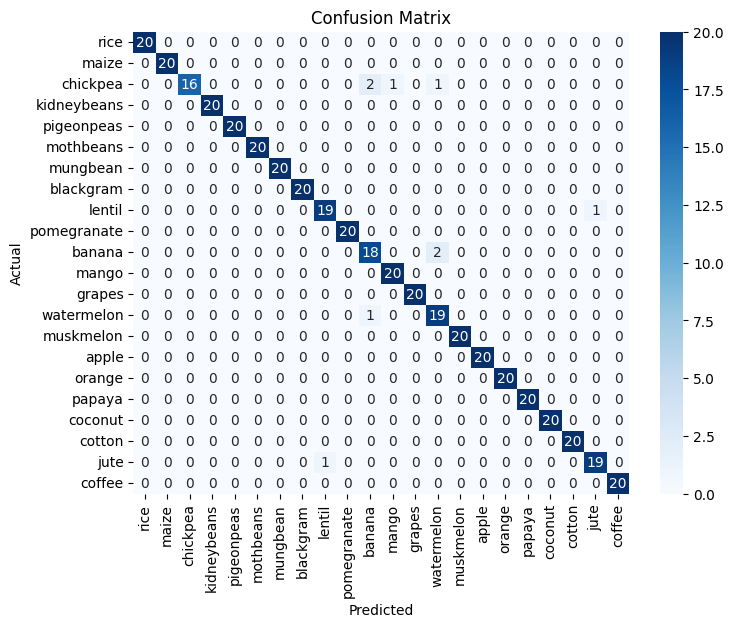

In [33]:
cm1 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_train_poly = poly.fit_transform(x_train_transformed)
x_test_poly = poly.transform(x_test_transformed)

# N   P   K  temperature   humidity        ph    rainfall

feature_names = poly.get_feature_names_out(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

x_train_poly_df = pd.DataFrame(x_train_poly, columns= feature_names)
x_test_poly_df = pd.DataFrame(x_test_poly, columns= feature_names)

x_train_poly_df.columns.unique()



Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'N P',
       'N K', 'N temperature', 'N humidity', 'N ph', 'N rainfall', 'P K',
       'P temperature', 'P humidity', 'P ph', 'P rainfall', 'K temperature',
       'K humidity', 'K ph', 'K rainfall', 'temperature humidity',
       'temperature ph', 'temperature rainfall', 'humidity ph',
       'humidity rainfall', 'ph rainfall'],
      dtype='object')

In [35]:
x_train_poly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   N                     1760 non-null   float64
 1   P                     1760 non-null   float64
 2   K                     1760 non-null   float64
 3   temperature           1760 non-null   float64
 4   humidity              1760 non-null   float64
 5   ph                    1760 non-null   float64
 6   rainfall              1760 non-null   float64
 7   N P                   1760 non-null   float64
 8   N K                   1760 non-null   float64
 9   N temperature         1760 non-null   float64
 10  N humidity            1760 non-null   float64
 11  N ph                  1760 non-null   float64
 12  N rainfall            1760 non-null   float64
 13  P K                   1760 non-null   float64
 14  P temperature         1760 non-null   float64
 15  P humidity           

In [36]:
dt_poly = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

dt_poly.fit(x_train_poly_df, y_train) 

y_pred_poly = dt_poly.predict(x_test_poly_df)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f'Accuracy: {accuracy_poly}')

Accuracy: 0.9772727272727273


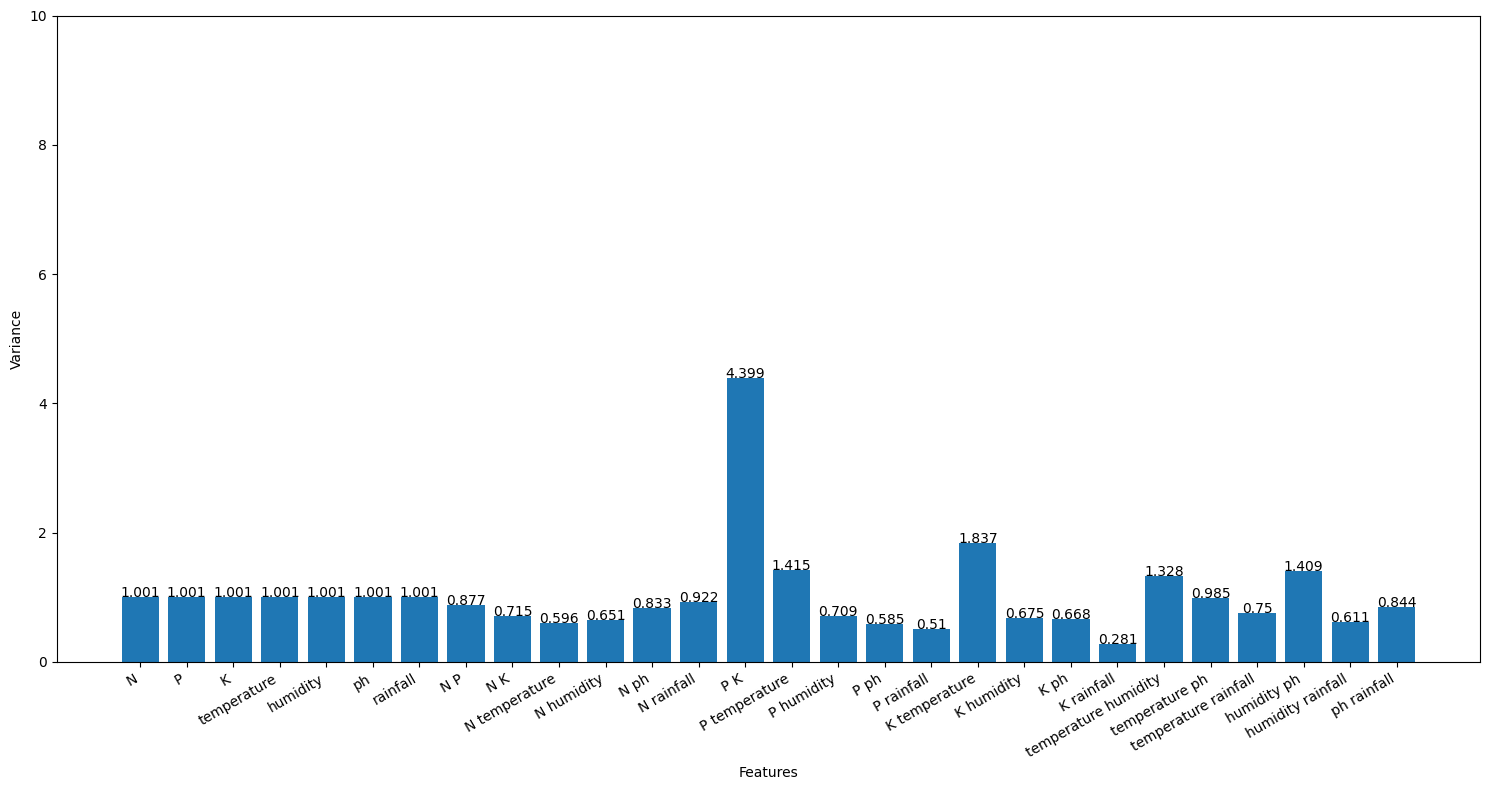

In [37]:
fig, ax = plt.subplots(figsize=(15, 8))

x_label = x_train_poly_df.columns
y_label = x_train_poly_df.var(axis=0)

ax.bar(x_label,y_label, width=0.8)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
ax.set_ylim(0,10)

for index, value in enumerate(y_label):
    plt.text(x=index, y=value+0.001, s=str(round(value,3)),ha='center')

fig.autofmt_xdate()
plt.tight_layout()

In [38]:
var_x_train = x_train_poly_df.drop(['K rainfall', 'P rainfall'], axis=1)
var_x_test = x_test_poly_df.drop(['K rainfall', 'P rainfall'], axis=1)


dt_var = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

dt_var.fit(var_x_train, y_train) 

y_pred_var = dt_var.predict(var_x_test)
accuracy_var = accuracy_score(y_test, y_pred_var)
print(f'Accuracy: {accuracy_var}')

Accuracy: 0.9818181818181818


In [39]:
estimator = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

rfe_cacr_list = []

x_train1, x_val, y_train1, y_val = train_test_split(x_train_poly_df, y_train, test_size=0.2, stratify=y_train, random_state=42)

for k in range(1,29):
    RFE_selector = RFE(estimator=estimator, n_features_to_select=k, step=1)
    RFE_selector.fit(x_train1, y_train1)

    final_train = RFE_selector.transform(x_train1)
    final_test = RFE_selector.transform(x_val)

    estimator.fit(final_train,y_train1)

    y_pred_sel = estimator.predict(final_test)

    cacr_sel = accuracy_score(y_val, y_pred_sel)

    rfe_cacr_list.append(cacr_sel)


# selector = RFE(estimator, n_features_to_select = 7  , step=1)

# selector = selector.fit(x_train_poly, y_train)


# feature_names_in_ = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'N P',
#        'N K', 'N temperature', 'N humidity', 'N ph', 'N rainfall', 'P K',
#        'P temperature', 'P humidity', 'P ph', 'P rainfall', 'K temperature',
#        'K humidity', 'K ph', 'K rainfall', 'temperature humidity',
#        'temperature ph', 'temperature rainfall', 'humidity ph',
#        'humidity rainfall', 'ph rainfall']

# selector.get_feature_names_out(feature_names_in_)

# selected_features_rfe = x_train_poly_df.columns[selector.support_]
# print(selected_features_rfe)

# final_train_df = x_train_poly_df[selected_features_rfe]
# final_test_df = x_test_poly_df[selected_features_rfe]

In [ ]:
# rfe_cacr_list

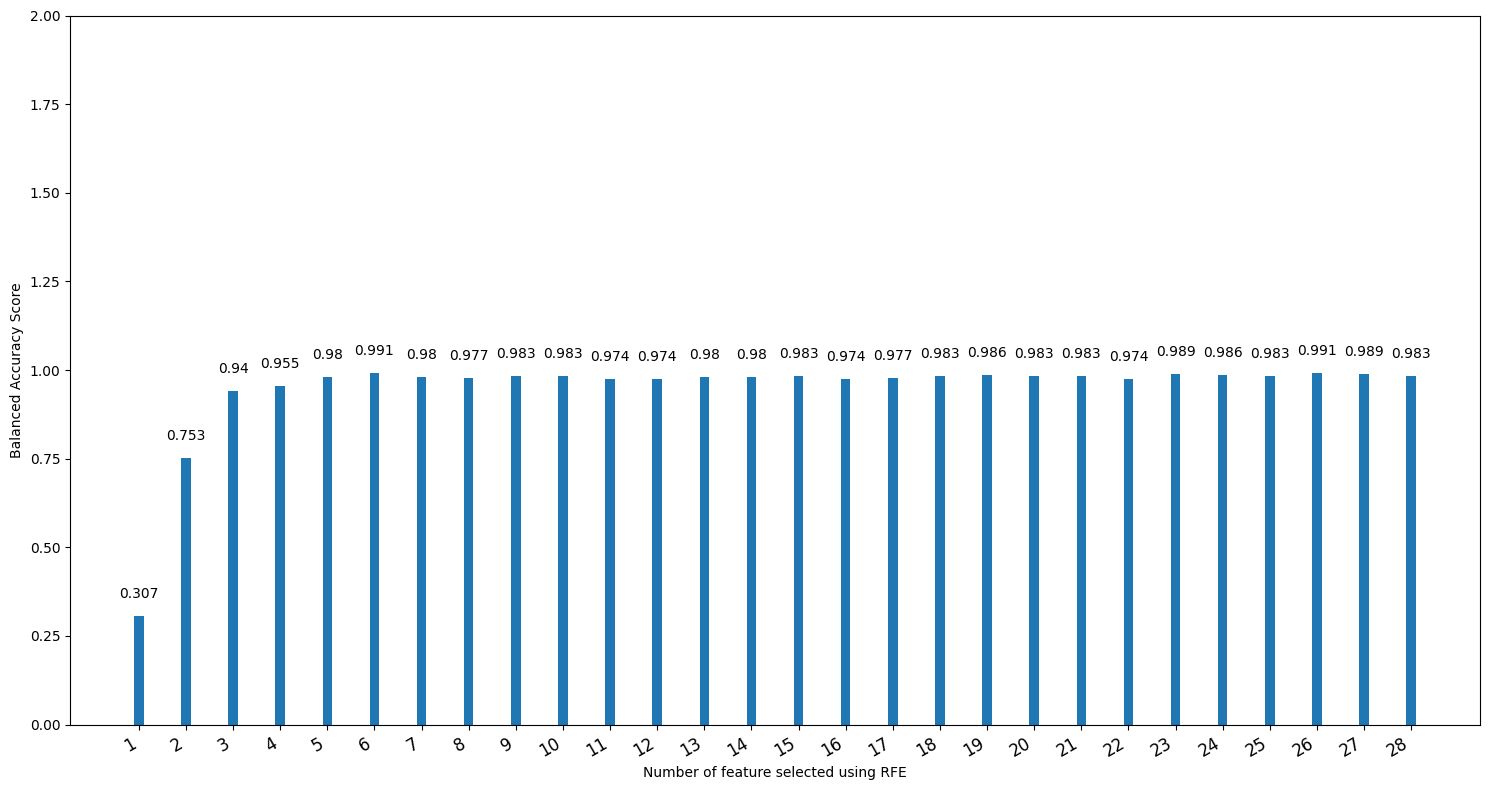

In [40]:
fig, ax = plt.subplots(figsize=(15, 8))

x_label = np.arange(1,29)
y_label = rfe_cacr_list

ax.bar(x_label,y_label, width=0.2)
ax.set_xlabel('Number of feature selected using RFE')
ax.set_ylabel('Balanced Accuracy Score')
ax.set_ylim(0,2)
ax.set_xticks(np.arange(1,29))
ax.set_xticklabels(np.arange(1,29), fontsize = 12)

for i, v in enumerate(y_label):
    plt.text(x=i+1 , y=v+0.05, s=str(round(v,3)),ha='center')

fig.autofmt_xdate()
plt.tight_layout()

In [41]:
RFE_selector = RFE(estimator=estimator, n_features_to_select=6, step=1)
RFE_selector.fit(x_train_poly_df, y_train)


x_train_sel = RFE_selector.transform(x_train_poly_df)
x_test_sel = RFE_selector.transform(x_test_poly_df)

selected_features_mask = RFE_selector.get_support()

selected_features = x_train_poly_df.columns[selected_features_mask]

selected_features


Index(['P', 'humidity', 'rainfall', 'N K', 'K humidity', 'K rainfall'], dtype='object')

In [42]:
dt_sel = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

dt_sel.fit(x_train_sel, y_train) 

y_pred_sel = dt_sel.predict(x_test_sel)
accuracy_sel = accuracy_score(y_test, y_pred_sel)
print(f'Accuracy: {accuracy_sel}')

Accuracy: 0.9863636363636363


In [43]:
max_depth= [2,5,8,None]
min_samples_split= [2,40, 80, 160]
max_features= [2,4,6, None]
min_impurity_decrease= [0.0, 0.2, 0.4, 0.6]


In [44]:
param_grid = {
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'max_features' : max_features,
    'min_impurity_decrease' : min_impurity_decrease
}

In [45]:
dt_opt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

dt_grid = GridSearchCV(estimator=dt_opt , param_grid= param_grid, cv=5, verbose=2, n_jobs=-1)

In [ ]:
dt_grid.fit(x_train_sel, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, None],
                         'max_features': [2, 4, 6, None],
                         'min_impurity_decrease': [0.0, 0.2, 0.4, 0.6],
                         'min_samples_split': [2, 40, 80, 160]},
             verbose=2)

In [ ]:
dt_grid.best_params_

{'max_depth': None,
 'max_features': 6,
 'min_impurity_decrease': 0.0,
 'min_samples_split': 2}

In [ ]:
dt_grid.best_score_

0.9829545454545455

In [ ]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=42, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)

In [ ]:
rf.fit(x_train_sel, y_train) 

y_pred_rf = rf.predict(x_test_sel)
accuracy_sel_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_sel_rf}')

Accuracy: 0.9818181818181818


In [ ]:
n_estimators = [40,100,160]
max_depth= [2,5,8,None]
min_samples_split= [2,40, 80, 160]
max_features= [2,4,6, None]
min_impurity_decrease= [0.0, 0.2, 0.4, 0.6]

In [ ]:
param_grid_rf = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'max_features' : max_features,
    'min_impurity_decrease' : min_impurity_decrease
}

In [ ]:
rf_grid = GridSearchCV(estimator=rf , param_grid= param_grid_rf, cv=5, verbose=2, n_jobs=-1)

In [ ]:
rf_grid.fit(x_train_sel, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(max_features=None),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, None],
                         'max_features': [2, 4, 6, None],
                         'min_impurity_decrease': [0.0, 0.2, 0.4, 0.6],
                         'min_samples_split': [2, 40, 80, 160],
                         'n_estimators': [40, 100, 160]},
             verbose=2)

In [ ]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 2,
 'min_impurity_decrease': 0.0,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
rf_grid.best_score_

0.9903409090909092

In [ ]:
rff = RandomForestClassifier(n_estimators=160, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=42, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)

In [ ]:
rff.fit(x_train_sel, y_train) 

y_pred_rff = rff.predict(x_test_sel)
accuracy_sel_rff = accuracy_score(y_test, y_pred_rff)
print(f'Accuracy: {accuracy_sel_rff}')

Accuracy: 0.9931818181818182


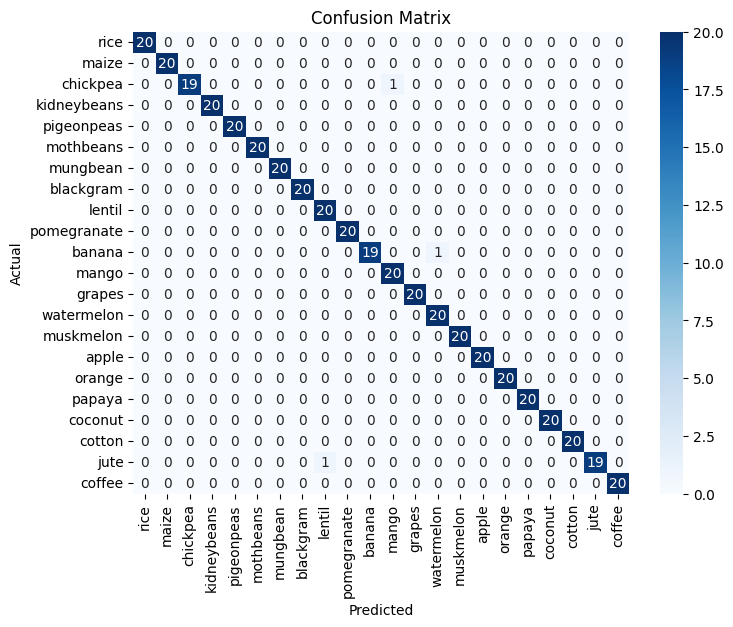

In [ ]:
cm = confusion_matrix(y_test, y_pred_rff)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

0. Random forest classifier
1. Hyperparameter tunning with gridcv and random cv
2. Different classification result methods - accuracy, cacr, etc